In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import numpy as np
import os
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [50]:
base_dir = "/Users/robertstein/ztfimages/543/"
path = os.path.join(base_dir, "ztf_20191002147454_000543_zr_c16_o_q1_sciimg.fits")

In [51]:
from astropy.io import fits
fits.info(path)

Filename: /Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c16_o_q1_sciimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  1             1 PrimaryHDU     268   (3072, 3080)   float32   


In [52]:
image_data = fits.getdata(path, ext=0)
print(fits.getheader(path, ext=0))

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32                                                  NAXIS   =                    2                                                  NAXIS1  =                 3072                                                  NAXIS2  =                 3080                                                  BUNIT   = 'Data Value'                                                          ORIGIN  = 'Zwicky Transient Facility' / Data origin                             OBSERVER= 'ZTF Robotic Observing Software' / Observer                           ROBOSOFT= '0.99.5  June 17, 2019' / Robotic software version                    FITSSOFT= '0.99.5  June 17, 2019' / FITS software version                       INSTRUME= 'ZTF/MOSAIC'         / Instrument name                                DETECTOR= '        '           / Detector controller                            DETSOFT = '        '           / Detecto

3.172048


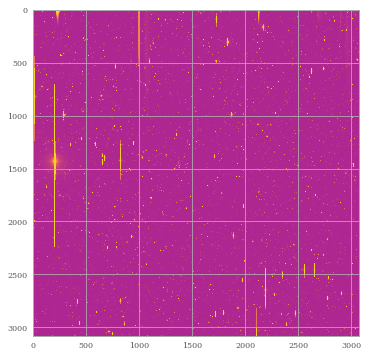

In [53]:
plt.figure()
z = np.log10(image_data)
vmax = 5.0
z[z > vmax] = np.median(z)
print(np.median(z))
plt.imshow(z, cmap='plasma', vmin=2.0, vmax=vmax)
# plt.colorbar()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 314.2741168995  8.434663914423  
CRPIX : 1536.5  1540.5  
CD1_1 CD1_2  : -0.0002812202512273  -1.439789582516e-06  
CD2_1 CD2_2  : 1.455585521133e-06  -0.000281275763608  
NAXIS : 3072  3080
3080
(-0.5, 3079.5)


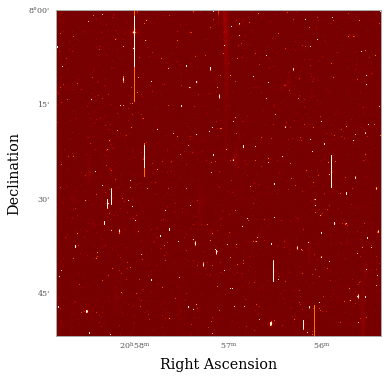

In [106]:
hdu = fits.open(path)[0]
wcs = WCS(hdu.header)
ax = plt.subplot(projection=wcs)
print(wcs)
print(len(z))
ax.imshow(np.log10(hdu.data), vmin=2.5)
ax.grid(color='white', ls='solid')
print(ax.get_ylim())
ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')

In [95]:
w = WCS(path) 
lon, lat = w.all_pix2world(30, 40, 0)
print(lon, lat)

314.7047518657879 8.853935272538504


8.0
/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c01_o_q1_sciimg.fits
/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c01_o_q2_sciimg.fits
/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c01_o_q3_sciimg.fits
/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c01_o_q4_sciimg.fits
/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c02_o_q1_sciimg.fits
/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c02_o_q2_sciimg.fits
/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c02_o_q3_sciimg.fits
/Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c02_o_q4_sciimg.fits


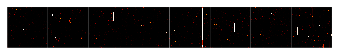

In [92]:
paths = [x for x in os.listdir(base_dir) if ".fits" in x]

ndim = np.sqrt(len(paths))
print(ndim)
fig = plt.figure()
for i, filename in enumerate(sorted(paths)[:8]):
    path = os.path.join(base_dir, filename)
    hdu = fits.open(path)[0]
    wcs = WCS(hdu.header)
    ax = plt.subplot(ndim, ndim, i+1, projection=wcs)
    print(path)
    z = np.log10(hdu.data)
    ax.imshow(z, vmin=np.median(z))
    ax.grid(color='white', ls='solid')
    ax.axis('off')
#     ax.set_xlabel('Declination')
#     ax.set_ylabel('Right Ascension')
fig.subplots_adjust(hspace=0.0, wspace=-0.75)